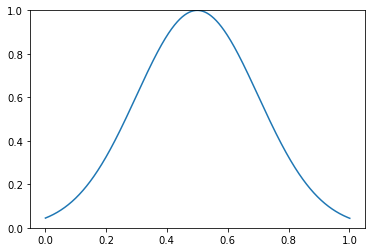

495.100569594


In [129]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

NX = 1000
NM=4
Nsteps = 30001
x = np.zeros(NX)
f = np.zeros([Nsteps, NX+2])
       
nout   = 300 
sizex  = 1.0 
dif    = 1.0 
vel    = 0.1 

dx    = sizex/float(NX-1)
cfld  = .5
cfla  = 0.1 
dtd    = cfld*dx*dx/dif 
dta    = cfla*dx/vel 
# dt    = min(dta,dtd)
dt = dta
sigma = 200*dx            #!  play with width
x = np.linspace(1,NX,NX)*dx
# for j in range(1,NX):
#     x[j] = dx*float(j-1)
#     xj   = (x[j]-sizex/2)/sigma
#     f[0,j] = np.exp(-0.5*xj*xj)
    
f[0][1:-1] = np.exp(-.5*np.power((x-sizex/2)/sigma,2))
f[0]=f[0]/np.max(f[0])
plt.plot(x,f[0][1:-1])
plt.ylim([0,1])
plt.show()
print(np.sum(f[0]))
#

In [2]:
def AD_update(t,f):
    a = cfld+0.5*cfla
    b = cfld-0.5*cfla
    c = 1.0-a-b
    f[t,j] = a*f[t-1,j-1]+c*f[t-1,j]+b*f[t-1,j+1]
def D_update(t,f):
    a = cfld
    b = cfld
    c = 1 - 2*cfld
    f[t,j] = a*f[t-1,j-1]+c*f[t-1,j]+b*f[t-1,j+1]

    



In [3]:
%%time
for t in range(1,Nsteps):
    #PBC
    f[t-1,0] = f[t-1,NX]
    f[t-1,-1] = f[t-1,1]
    # Updating 
    if t % 100 == 0:
        print(t)
    for j in range(1,NX+1):
#         AD_update(t,f)
        D_update(t,f)

5000
10000
15000
20000
25000
30000
CPU times: user 54.4 s, sys: 100 ms, total: 54.5 s
Wall time: 54.6 s


100
200
300
400
500
600
700
800
900
CPU times: user 1.65 s, sys: 12 ms, total: 1.66 s
Wall time: 1.73 s


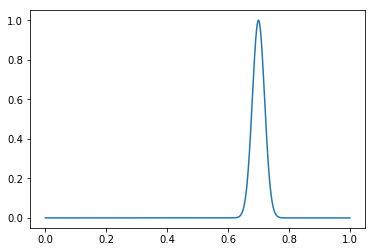

In [162]:
%%time
cfld = .2
cfla = .5
Nsteps = 1000
f = np.zeros([Nsteps, NX+2])
sigma = 20*dx            #!  play with width
x = np.linspace(0,1,NX)
# for j in range(1,NX):
#     x[j] = dx*float(j-1)
#     xj   = (x[j]-sizex/2)/sigma
#     f[0,j] = np.exp(-0.5*xj*xj)
    
f[0][1:-1] = np.exp(-.5*np.power((x-.7)/sigma,2))
f[0]=f[0]/np.max(f[0])
plt.plot(x,f[0][1:-1])
def AD_update(t,f):
    a = .2+0.5*.5
    b = .2-0.5*.5
    c = 1.0-2*.2
    f[t,j] = a*f[t-1,j-1]+c*f[t-1,j]+b*f[t-1,j+1]
    
for t in range(1,Nsteps):
    #PBC
    f[t-1,0] = f[t-1,NX]
    f[t-1,-1] = f[t-1,1]
    # Updating 
    if t % 100 == 0:
        print(t)
    for j in range(1,NX+1):
        AD_update(t,f)
#         D_update(t,f)

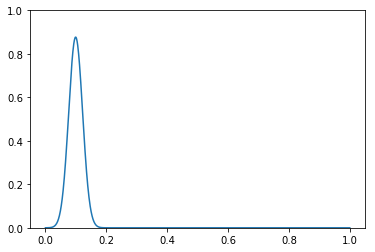

In [163]:
plt.plot(x,f[800][1:-1])
plt.ylim([0,1])
plt.show()

In [165]:
print(np.sum(f[0]))
print(np.sum(f[800]))

50.1382057235
50.1383127554


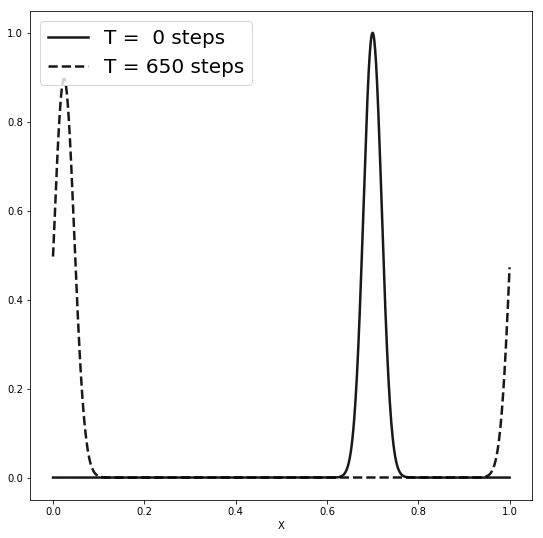

In [172]:
plt.figure(figsize=(9,9))
lw = 2
plt.plot(x,f[0][1:-1],'k',alpha = .9, lw = lw+.5,label = "T =  0 steps")
plt.plot(x,f[650][1:-1],'k--',alpha = .9, lw = lw+.5,label = "T = 650 steps")
plt.legend(fontsize = 20)
plt.xlabel('X')
plt.show()

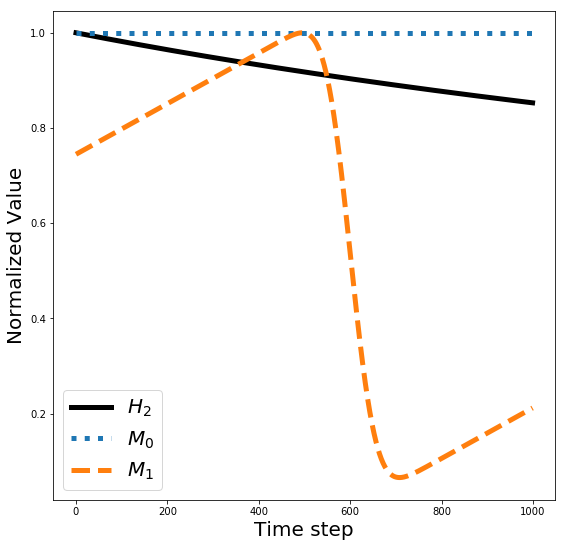

In [193]:
def calc_H(f,dx):
    tot = 0
    for i in f:
        tot += i*i*dx
    return tot
def calc_M0(f):
    return np.sum(f)
def calc_M1(f,x):
    return np.dot(f,x)
dx = x[1]-x[0]
list_H = []
list_M0 = []
list_M1 = []
for i in range(len(f)):
    list_H.append(calc_H(f[i][1:-1],dx))
    list_M0.append(calc_M0(f[i][1:-1]))
    list_M1.append(calc_M1(f[i][1:-1],x))
def norm(x):
    np.array(x)
    x/=np.max(x)
    return x

plt.figure(figsize =(9,9))
plt.plot(list(range(len(f))),norm(list_H),'k',lw=5 , label = r"$H_2$")
plt.plot(list(range(len(f))),norm(list_M0),':',lw=5 , label = r"$M_0$")
plt.plot(list(range(len(f))),norm(list_M1),'--',lw=5 , label = r"$M_1$")
fs = 20
plt.ylabel("Normalized Value",fontsize =fs)
plt.legend(fontsize = fs)

plt.xlabel("Time step",fontsize = fs)
plt.show()


495.193467939


(29000, 30005)

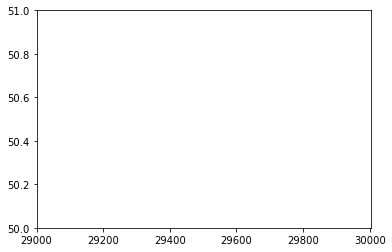

In [5]:
print(np.sum(f[30]))
plt.plot(range(Nsteps),np.sum(f[:,1:-1],axis=1)) # indexing to remove boundary cond pts
plt.ylim([50,51])
plt.xlim([29000,30005])

# Now with Dirichlet Boundary Conditions

In [125]:

PHI = 50
Nsteps = 30000
cfld=.4
def D_update(t,f,j):
    a = cfld
    b = cfld
    c = 1 - 2*cfld
    f[t,j] = a*f[t-1,j-1]+c*f[t-1,j]+b*f[t-1,j+1]
    

f = np.zeros([Nsteps, NX])
x = np.linspace(1,NX,NX)*dx



In [126]:
%%timeit
for t in range(1,Nsteps):
    #Dirichlet Boundary Conditions
    f[t-1,0] = PHI
    f[t-1,-1] = PHI
    # Updating 
#     if t % 500 == 0:
#         print(t)
    for j in range(1,NX-1):
        D_update(t,f,j)


1 loop, best of 3: 4.55 s per loop


In [124]:
(4 * Nsteps*NX)/(5)*10**-9

0.0024000000000000002

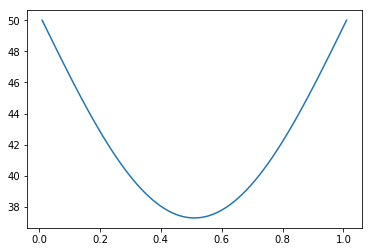

In [85]:
plt.plot(x,f[-2])
# plt.ylim([0,1])
plt.show()

In [121]:
cfld

0.4

In [104]:
# As  matrix
T = np.zeros([NX+2,NX+2])
print(T.shape)
a = cfld
b=cfld
c=1-2*cfld
for n in range(1,NX+1):
    T[n][n-1]=a
    T[n][n]=c
    T[n][n+1]=b
    
T[0][0] = 1
T[-1][-1] = 1
print(T)
Nsteps = 30000
f = np.zeros([Nsteps, NX+2])

x = np.linspace(1,NX,NX+2)*dx
f[0,0] = PHI
f[0,-1] = PHI


(102, 102)
[[ 1.   0.   0.  ...,  0.   0.   0. ]
 [ 0.4  0.2  0.4 ...,  0.   0.   0. ]
 [ 0.   0.4  0.2 ...,  0.   0.   0. ]
 ..., 
 [ 0.   0.   0.  ...,  0.2  0.4  0. ]
 [ 0.   0.   0.  ...,  0.4  0.2  0.4]
 [ 0.   0.   0.  ...,  0.   0.   1. ]]


In [105]:
%%timeit
for t in range(1,Nsteps):
#     print((np.dot(T,f[t-1]).shape))
    f[t] = np.dot(T,f[t-1])


10 loops, best of 3: 129 ms per loop


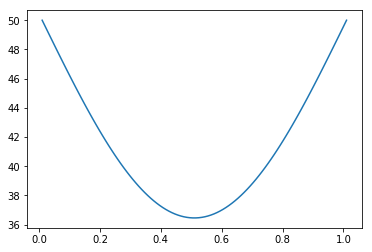

In [88]:
plt.plot(x,f[-2])
# plt.ylim([0,1])
plt.show()

In [119]:
NX

100

In [120]:
%%time
print(T.shape)
print(np.linalg.matrix_power(T,5000))
print(np.dot(np.linalg.matrix_power(T,5000),f[0]))

(102, 102)
[[  1.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  9.87231940e-01   2.79859129e-06   5.59437883e-06 ...,   5.46192041e-06
    2.73223372e-06   7.05107200e-03]
 [  9.74466678e-01   5.59437883e-06   1.11831532e-05 ...,   1.09187489e-05
    5.46192041e-06   1.41048762e-02]
 ..., 
 [  1.41048762e-02   5.46192041e-06   1.09187489e-05 ...,   1.11831532e-05
    5.59437883e-06   9.74466678e-01]
 [  7.05107200e-03   2.73223372e-06   5.46192041e-06 ...,   5.59437883e-06
    2.79859129e-06   9.87231940e-01]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   1.00000000e+00]]
[ 50.          49.71415059  49.42857773  49.14355767  48.85936618
  48.57627817  48.29456753  48.01450678  47.73636687  47.46041688
  47.18692378  46.91615216  46.64836396  46.38381825  46.12277097
  45.86547467  45.61217825  45.36312678  45.11856118  44.87871807
  44.64382947  44.41412262  44.18981975  43.9

## Now 2D

In [194]:
def D_2D_update(t,f,i,j):
    a = cfld
    b = cfld
    c = 1-4*cfld
    f[t,i,j]  = a*f[t-1,i-1,j]+b*f[t-1,i+1,j]
    f[t,i,j] += a*f[t-1,i,j-1]+b*f[t-1,i,j+1]
    f[t,i,j] += c*f[t-1,i,j]

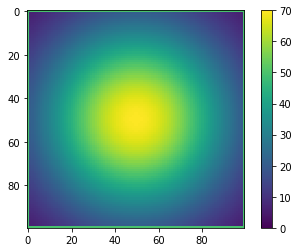

In [203]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D


Nsteps = 400
NX = 100
sizex  = 1.0 
dif    = 1.0 


dx    = sizex/float(NX-1)


x = np.linspace(0,1,NX)
f = np.zeros([Nsteps,NX,NX])
PHI = 50
D = 1
# h 
cfld = .2


#Parameters to set
mu_x = np.mean(x)
variance_x = .1

mu_y = np.mean(x)
variance_y = .1


X, Y = np.meshgrid(x,x)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

f[0]+=rv.pdf(pos)/np.max(rv.pdf(pos))*70
f[0,0,:]  = PHI
f[0,-1,:] = PHI
f[0,:,0]  = PHI
f[0,:,-1] = PHI

# im=plt.imshow(data[None], aspect='auto',cmap=cmap, norm=norm)
# cbar = plt.colorbar(im)
# cbar
plt.imshow(f[0],vmin=0,vmax=70)
plt.colorbar()
plt.show()

def new_f_2D(Nsteps, NX, PHI):
    f = np.zeros([Nsteps,NX,NX])
    f[0]+=rv.pdf(pos)/np.max(rv.pdf(pos))*70
    f[0,0,:]  = PHI
    f[0,-1,:] = PHI
    f[0,:,0]  = PHI
    f[0,:,-1] = PHI
    return f
def loop_2D(f,PHI,Nsteps, NX):
    for t in range(1,Nsteps):
        #Dirichlet Boundary Conditions
        f[t-1,0,:]  = PHI
        f[t-1,-1,:] = PHI
        f[t-1,:,0]  = PHI
        f[t-1,:,-1] = PHI
        # Updating 
        for i in range(1,NX-1):
            for j in range(1,NX-1):
                D_2D_update(t,f,i,j)

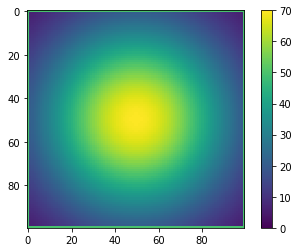

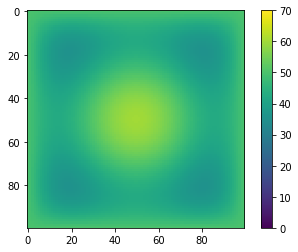

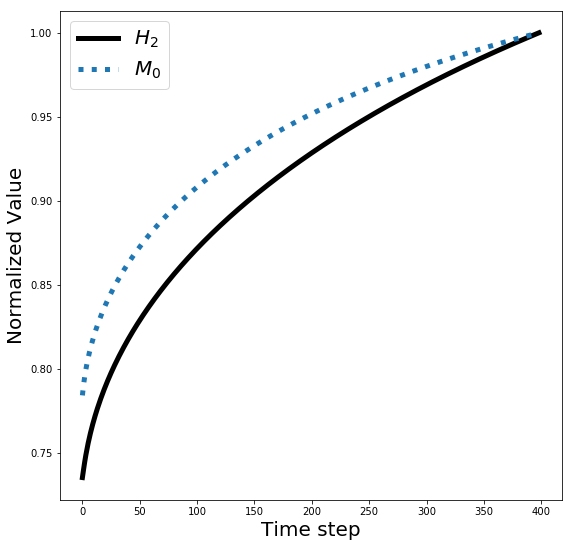

In [211]:

loop_2D(f,PHI, Nsteps, NX)
plt.imshow(f[0],vmin=0,vmax=70)
plt.colorbar()
plt.show()
plt.imshow(f[-2],vmin=0,vmax=70)
plt.colorbar()
plt.show()
diag(x,f)

In [209]:
def calc_H(f,dx):
    tot = 0
    for i in f.flatten():
        tot += i*i*dx
    return tot
def calc_M0(f):
    return np.sum(f)
def calc_M1(f,x):
    return np.sum(f,x)

def norm(x):
    np.array(x)
    x/=np.max(x)
    return x
def diag(x,f):
    dx = x[1]-x[0]
    list_H = []
    list_M0 = []
    list_M1 = []
    for i in range(len(f)-1):
        list_H.append(calc_H(f[i][1:-1],dx))
        list_M0.append(calc_M0(f[i][1:-1]))
    #     list_M1.append(calc_M1(f[i][1:-1],x))
    plt.figure(figsize =(9,9))
    plt.plot(list(range(len(f)-1)),norm(list_H),'k',lw=5 , label = r"$H_2$")
    plt.plot(list(range(len(f)-1)),norm(list_M0),':',lw=5 , label = r"$M_0$")
    # plt.plot(list(range(len(f))),norm(list_M1),'--',lw=5 , label = r"$M_1$")
    fs = 20
    plt.ylabel("Normalized Value",fontsize =fs)
    plt.legend(fontsize = fs)

    plt.xlabel("Time step",fontsize = fs)
    plt.show()


In [208]:
f_0_bound = new_f_2D(300, 100,0)
loop_2D(f_0_bound,0, 300, 100)


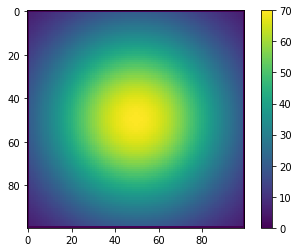

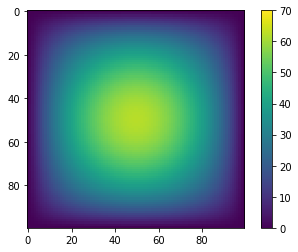

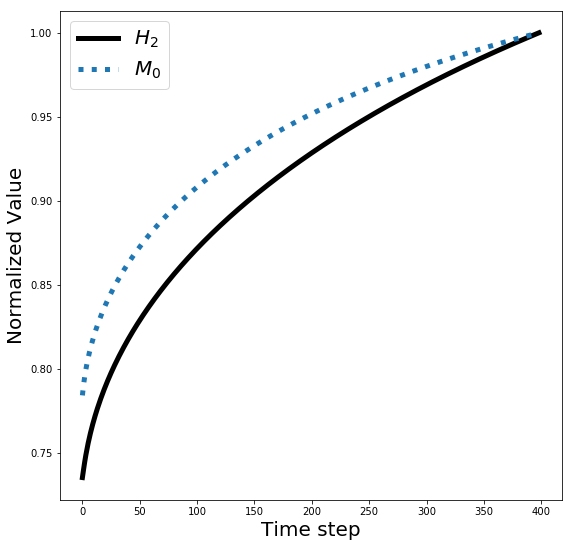

In [215]:
plt.imshow(f_0_bound[0],vmin=0,vmax=np.max(f_0_bound))
plt.colorbar()
plt.show()
plt.imshow(f_0_bound[-2],vmin=0,vmax=np.max(f_0_bound))
plt.colorbar()
plt.show()
diag(x,f)

# Plots for problem 1

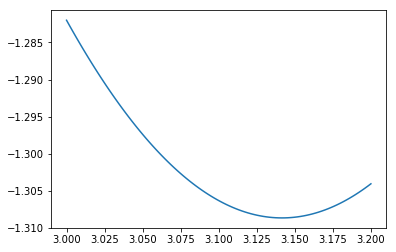

In [47]:
kd = np.linspace(0,7.5,100)
delta = .49

def get_gamma(kd, delta,alpha):
#     alpha = delta # alpha < 2*delta
    C =  np.cos(kd) -1
    S = np.sin(kd)
    gamma = np.log((1+2*delta * C)**2+alpha**2*S**2)
    return gamma
kd = np.linspace(3,3.2,100)

plt.plot(kd,get_gamma(kd,delta**2/2,delta))

# plt.plot(kd,get_gamma(kd,delta,delta))
# plt.xlim([3,3.20])
# plt.ylim([-.1,.1])

Ok so $\alpha$ doesn't affect the zeros so we'll use $\alpha = \delta$

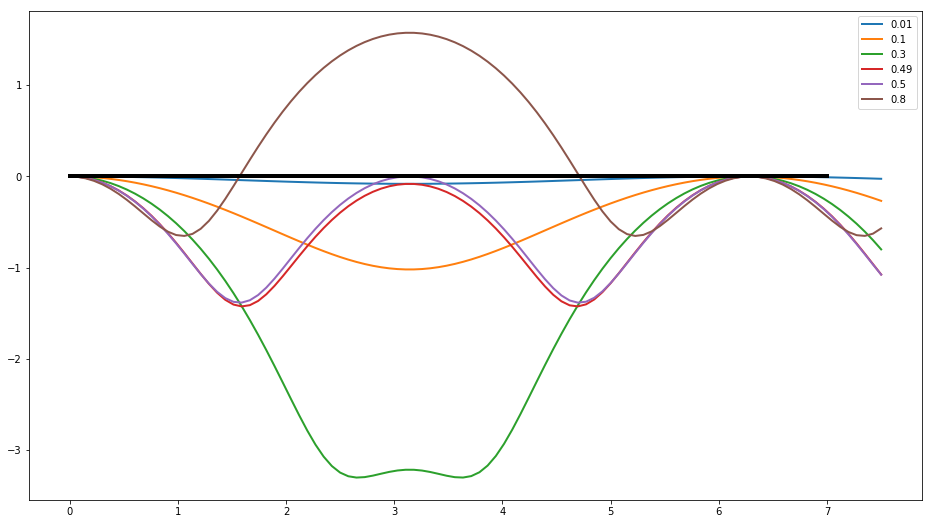

In [41]:
plt.figure(figsize=(16,9))
for delta in [.01,.1,.3,.49,.5,.8]:
    plt.plot(kd,get_gamma(kd,delta,delta),label=delta,lw=2)
plt.plot([0,7],[0,0],'k',lw=4)
plt.legend()

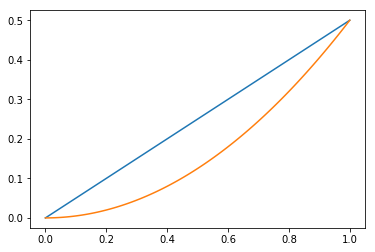

In [39]:
alpha = np.linspace(0,1,100)
gamma = alpha/2
gamma_2 = alpha**2/2
plt.plot(alpha,gamma)
plt.plot(alpha,gamma_2)

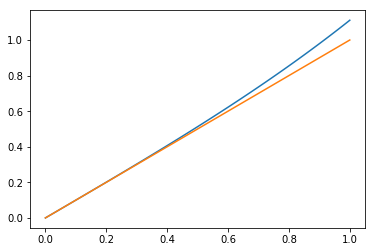

In [113]:
U = 1
d = 1
D = .2
k = np.linspace(0,1,100)
h = 1
omega_r_discrete  = U*k / (1-D*h*k**2/2)
plt.plot(k, omega_r_discrete)
plt.plot(k, U*k)